In [87]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 당뇨 데이터셋 로드
diabetes = load_diabetes()

print(diabetes.keys())
print(diabetes.data.shape)
print(diabetes.feature_names)
print(diabetes.target.shape)
print(diabetes.target_filename)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442,)
diabetes_target.csv.gz


In [92]:
import pandas as pd

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [61]:
df['sex'] = [ 0 if gender > 0 else 1 for gender in df['sex']]
df['sex'].head()

0    0
1    1
2    0
3    1
4    1
Name: sex, dtype: int64

In [21]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [28]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [65]:
# 당뇨 데이터셋 로드
X, y = diabetes.data, df['sex']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-NN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



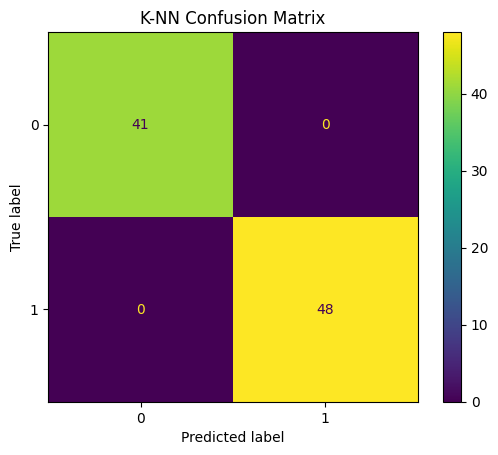

In [66]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("K-NN Confusion Matrix")
plt.show()

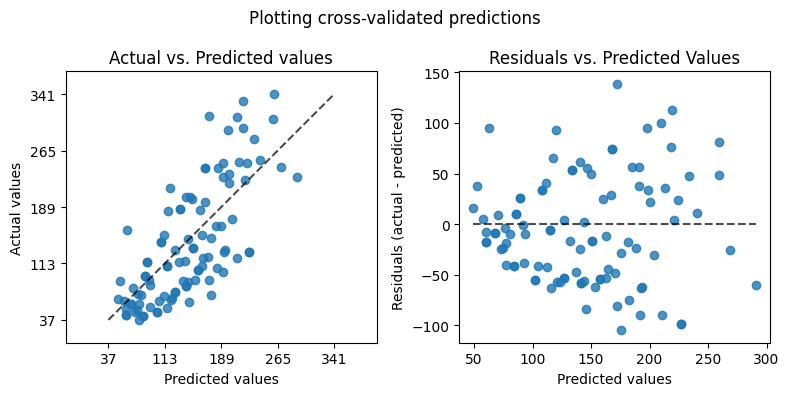

In [5]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [77]:
# 로지스틱 회귀 예제

# 필요한 라이브러리 임포트
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 당뇨 데이터셋 로드
X, y = diabetes.data, df['sex']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



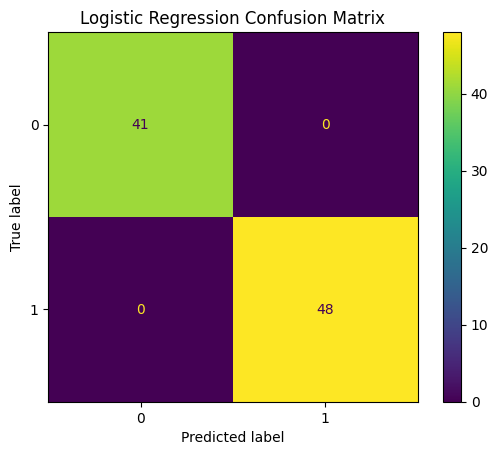

In [78]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [69]:
# 서포트 벡터 머신 (SVM) 예제

# 필요한 라이브러리 임포트
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 당뇨 데이터셋 로드
X, y = diabetes.data, df['sex']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM 모델 학습
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 및 평가
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



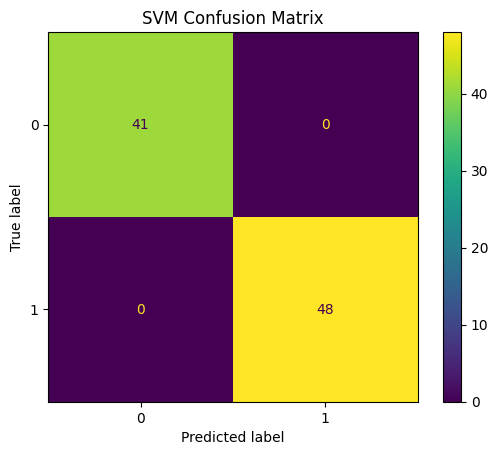

In [70]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

In [74]:
load_diabetes(return_X_y=True)


(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [84]:
# 결정 트리 예제

# 필요한 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 당뇨
X, y = load_diabetes(return_X_y=True)

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

len(X), len(X_train), len(X_test)
print('train ratio: {:.2f}'.format(len(X_train)/len(X)))
print('################')

# 결정 트리 모델 학습
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

train ratio: 0.70
################
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         0
        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         2
        49.0       0.00      0.00      0.00         0
        50.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         0
        58.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         2
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

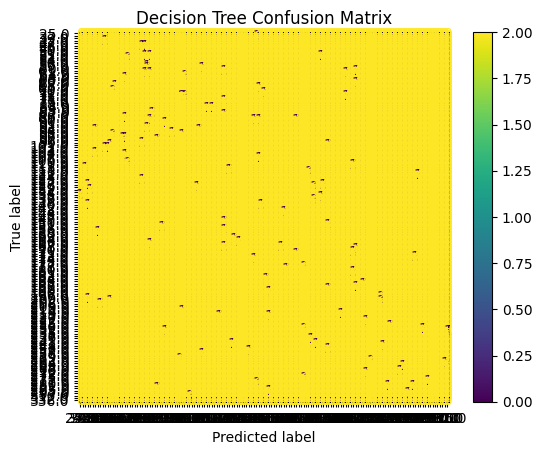

In [76]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

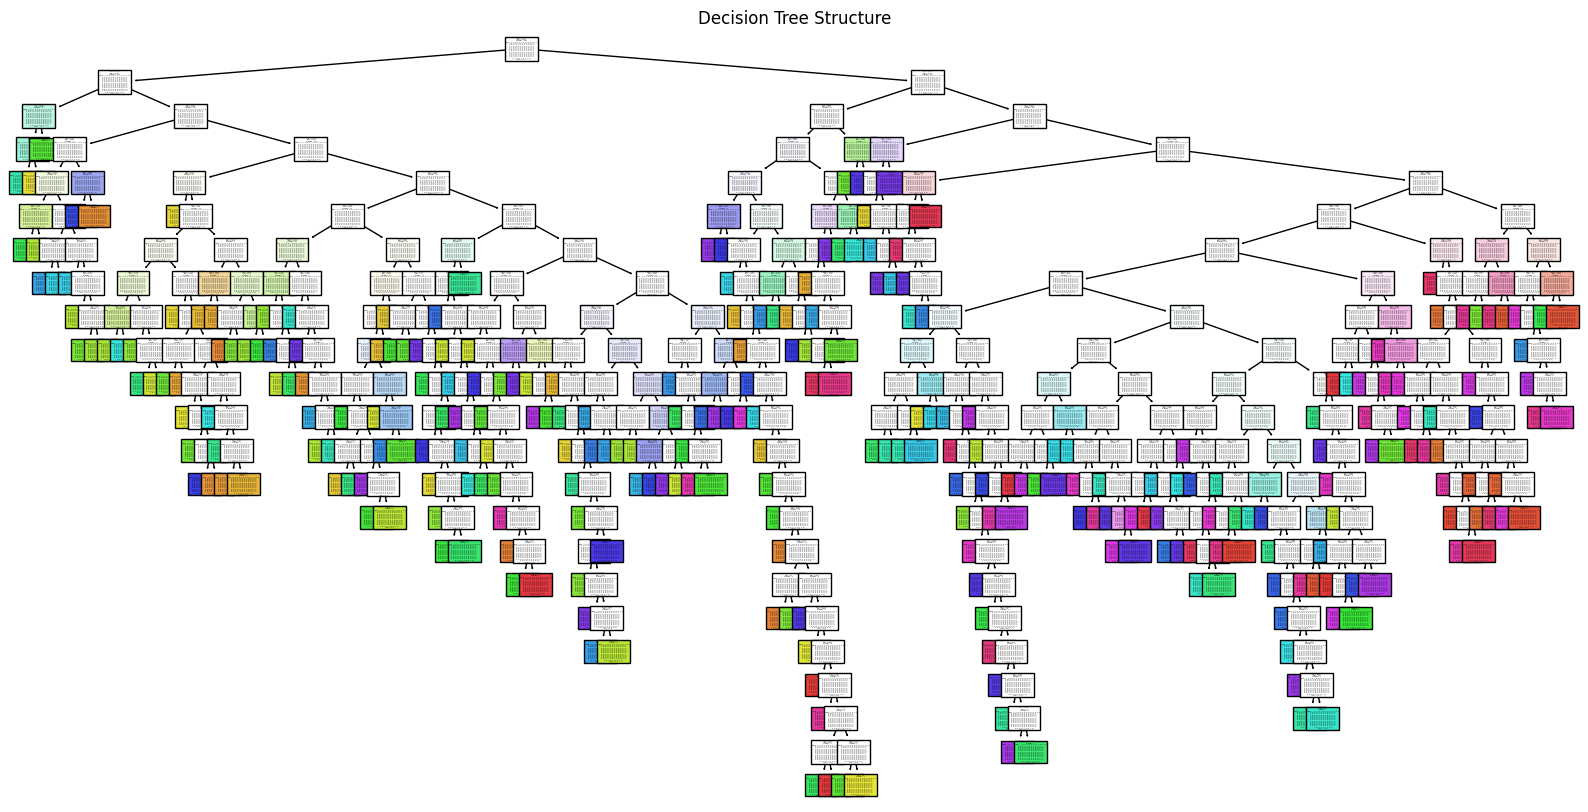

In [88]:
# 결정 트리 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=diabetes.feature_names, class_names=[str(x) for x in set(y)]) # Use the features and classes from the loaded diabetes dataset
plt.title("Decision Tree Structure")
plt.show()

In [89]:
# 랜덤 포레스트 예제

# 필요한 라이브러리 임포트
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


diabetes = load_diabetes()
# 당뇨 데이터셋 로드
X, y = diabetes.data, df['sex']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        48

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



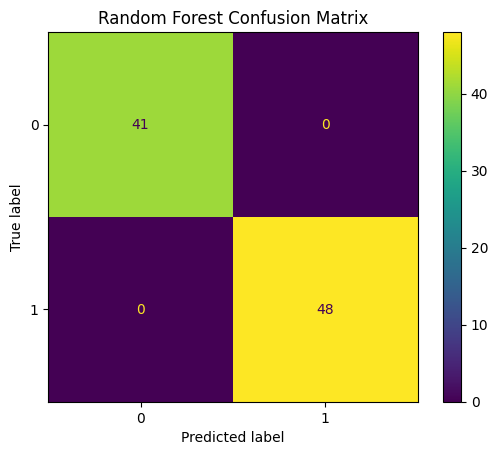

In [90]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
# 다층 퍼셉트론 (Multilayer Perceptron) 예제

# 필요한 라이브러리 임포트
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [95]:
# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784')
X, y = mnist.data / 255., mnist.target

In [96]:
# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다층 퍼셉트론 모델 학습
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=0.1)
mlp.fit(X_train, y_train)

# 예측 및 평가
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

Iteration 1, loss = 0.32666430
Iteration 2, loss = 0.25799440
Iteration 3, loss = 0.20402879
Iteration 4, loss = 0.17531073
Iteration 5, loss = 0.14613715
Iteration 6, loss = 0.13942319
Iteration 7, loss = 0.13021557
Iteration 8, loss = 0.13022002
Iteration 9, loss = 0.12556882
Iteration 10, loss = 0.11247478
Iteration 11, loss = 0.10460484
Iteration 12, loss = 0.11144142
Iteration 13, loss = 0.11057812
Iteration 14, loss = 0.11260484
Iteration 15, loss = 0.11193568
Iteration 16, loss = 0.13083183
Iteration 17, loss = 0.13530305
Iteration 18, loss = 0.11458551
Iteration 19, loss = 0.12796077
Iteration 20, loss = 0.11219598
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.97      0.98      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.95      0.93      0.94      1433
           4       0.96      0.95      0.95      1295
           5       0.93      0.93      0.93 

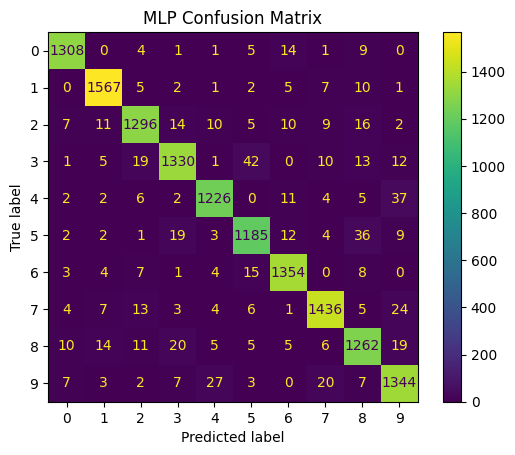

In [97]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.title("MLP Confusion Matrix")
plt.show()